In [1]:
import torch
import torch.nn as nn

from classifier import GolemClassifier
from backbone import GolemBackbones
from model_factories import Model, train_model, load_model, getBestModelParams
from dataloaders import get_dataloaders
from model_utils import train_epoch, eval
from plotter import plot_images, plot_loss, plot_metrics

In [2]:
device = torch.device(
        "mps"
        if torch.backends.mps.is_available()
        else "cuda" if torch.cuda.is_available() else "cpu"
    )

IsTesting = False
if IsTesting:
    data_name = "cifar10"
else:
    data_name = "cifar100"

# CIFAR-10(0) TEST RUN

## Data loading for custom CNN

In [4]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting)
CLASSES_NUM = len(classes)

## Optimal Model Hyperparameters for Custom Backbone Classifier

In [5]:
gc = GolemClassifier(GolemBackbones.GM3, CLASSES_NUM)
gc.to(device)

# lr, loss, criterion, optim = getBestModelParams(gc, train_loader, device)
# print(f"Optim lr: {lr}\nLoss: {loss}\nBest optim: {optim}\nBest loss func: {criterion}")

# LR = lr

EPOCHS = 50

LR = 1e-3
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

## Scenario 1 - Custom Backbone

In [6]:
gc = GolemClassifier(GolemBackbones.GM3, CLASSES_NUM)
gc.to(device)
criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
training_losses = []
validation_losses = []

for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    training_losses.append(loss)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
model_name = "customBackbone"

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("Custom backbone results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}")

## Data Loading for pretrained CNN

In [3]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting, img_size=224)
CLASSES_NUM = len(classes)

## Scenario 2 - ResNet18 Linear Probing

In [4]:
EPOCHS = 50
LR_LP = 1e-3
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

In [ ]:
gc, training_losses = train_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_LP,
                epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_LP,
#                 epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

In [ ]:
model_name = "resnet18"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_lp")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_lp")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_lp")

## Scenario 2 - ResNet18 Fine-Tuning

In [ ]:
EPOCHS = 50
LR_FT = 1e-4
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

In [ ]:
gc, training_losses = train_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_FT,
                epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_FT,
#                 epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

In [ ]:
model_name = "resnet18"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_ft")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_ft")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_ft")

## Scenario 3 - ResNet34 Linear Probing

In [4]:
EPOCHS = 50
LR_LP = 1e-3
LR_FT = 1e-4
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

In [5]:
gc, training_losses = train_model(model=Model.RESNET34, criterion=criterion, optimizer=optim, lr=LR_LP,
                epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_LP,
#                 epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

Epoch 1/50 loss: 970.7810009717941

Epoch 2/50 loss: 615.915922164917

Epoch 3/50 loss: 551.764918744564

Epoch 4/50 loss: 519.0886428356171

Epoch 5/50 loss: 498.73195350170135

Epoch 6/50 loss: 481.1151725053787

Epoch 7/50 loss: 469.99687254428864

Epoch 8/50 loss: 458.2369158267975

Epoch 9/50 loss: 450.96318405866623

Epoch 10/50 loss: 441.3735896348953

Epoch 11/50 loss: 435.11124700307846

Epoch 12/50 loss: 429.5315052270889

Epoch 13/50 loss: 423.84358751773834

Epoch 14/50 loss: 420.8210645914078

Epoch 15/50 loss: 415.109856069088

Epoch 16/50 loss: 410.8504403233528

Epoch 17/50 loss: 406.0782967209816

Epoch 18/50 loss: 403.5422432422638

Epoch 19/50 loss: 399.8899236321449

Epoch 20/50 loss: 396.32053315639496

Epoch 21/50 loss: 395.115586578846

Epoch 22/50 loss: 391.0185327529907

Epoch 23/50 loss: 387.8780099749565

Epoch 24/50 loss: 385.15100944042206

Epoch 25/50 loss: 383.1784388422966

Epoch 26/50 loss: 381.21257680654526

Epoch 27/50 loss: 380.21347415447235

Epoch

ResNet34 results: 
Avg loss 1.5228939780706092
Accu 0.6057
Precision 0.6186123059429318
Recall 0.6056999999999999
F-score 0.6052788068791992



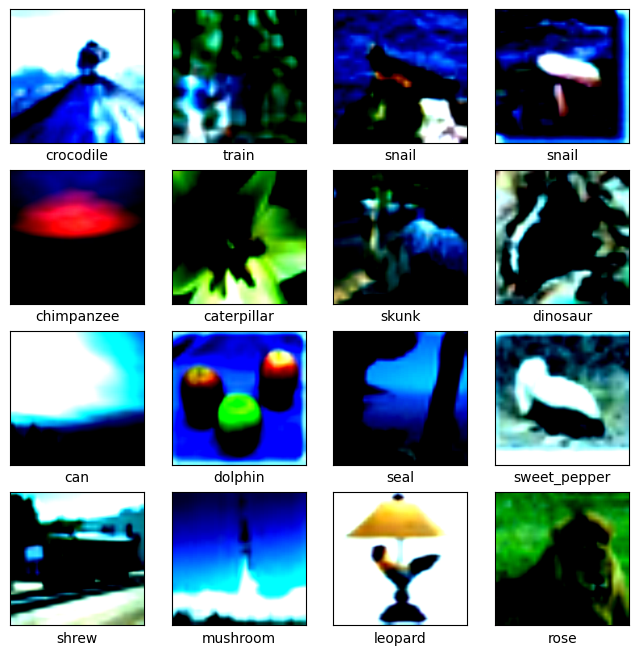

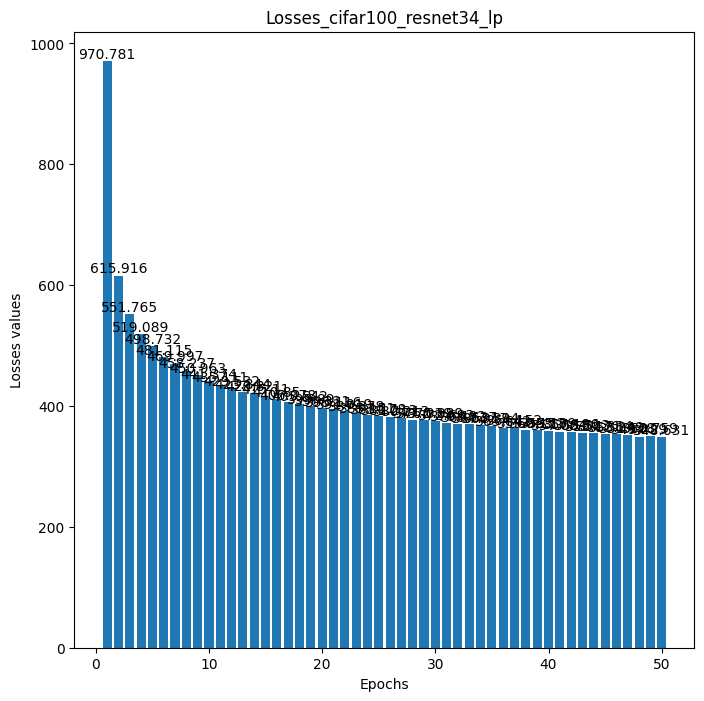

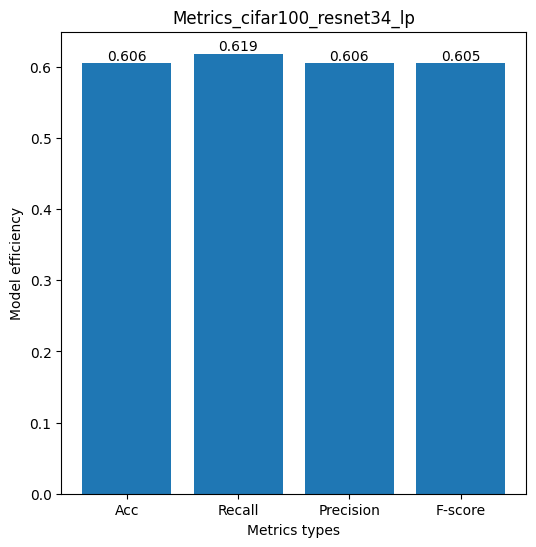

In [6]:
model_name = "resnet34"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_lp")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_lp")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_lp")

## Scenario 3 - ResNet34 Fine-Tuning

In [7]:
EPOCHS = 50
LR_LP = 1e-3
LR_FT = 1e-4
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

In [ ]:
gc, training_losses = train_model(model=Model.RESNET34, criterion=criterion, optimizer=optim, lr=LR_FT,
                epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.RESNET18, criterion=criterion, optimizer=optim, lr=LR_FT,
#                 epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

In [ ]:
model_name = "resnet34"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_fp")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_fp")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_fp")

## Scenario 4 - ViTbase Linear Probing

In [ ]:
gc, training_losses = train_model(model=Model.VITBASE, criterion=criterion, optimizer=optim, lr=LR_LP,
                epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.VITBASE, criterion=criterion, optimizer=optim, lr=LR_LP,
#                 epochs=EPOCHS, is_lp=True, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

In [ ]:
model_name = "vitbase"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_lp")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_lp")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_lp")

## Scenario 4 - ViTbase Fine-Tuning

In [ ]:
gc, training_losses = train_model(model=Model.VITBASE, criterion=criterion, optimizer=optim, lr=LR_FT,
                epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)
# gc = load_model(model=Model.VITBASE, criterion=criterion, optimizer=optim, lr=LR_FT,
#                 epochs=EPOCHS, is_lp=False, dataloader=train_loader, classes_num=CLASSES_NUM, device=device)

In [ ]:
model_name = "vitbase"
criterion_gc = criterion()

loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title=f"Classification_{data_name}_{model_name}_ft")
plot_loss(training_losses, EPOCHS, title=f"Losses_{data_name}_{model_name}_ft")
plot_metrics(metrics, title=f"Metrics_{data_name}_{model_name}_ft")